Library importing

In [2]:
import os
import pandas as pd
import regex as re
import numpy as np
import spacy
from rapidfuzz import process
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_lg")

Loading the dataset

In [3]:
import pandas as pd
import os

# Folder path
path = ".\\datasets"  # ya r".\datasets" bhi chalega

# File name
file_name = "bbc-text.csv"

# Full path
file_path = os.path.join(path, file_name)

# Dataset load karna
news_df = pd.read_csv(file_path)

# First 5 rows dekhna
print(news_df.head())


# Dataset info check karna
print(news_df.info())

        category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB
None


In [4]:
# def load_news_articles(base_path):
#     data = []
#     categories = os.listdir(base_path)
    
#     for category in categories:
#         category_path = os.path.join(base_path, category)
#         if os.path.isdir(category_path):
#             for filename in os.listdir(category_path):
#                 file_path = os.path.join(category_path, filename)
#                 with open(file_path, 'r', encoding = 'latin1') as file:
#                     content = file.read()
#                     data.append((content, category))
    
#     return pd.DataFrame(data, columns = ['text', 'category'])

# news_df = load_news_articles(path)

In [5]:
news_df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [6]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [7]:
news_df["category"].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

Named-Entitiy

In [8]:
def preserve_entities(text):
    doc = nlp(text)
    preserved = text
    for ent in doc.ents:
        tag = f"<{ent.label_}:{ent.text.replace(' ', '_')}>" # Replace spaces with underscores in the entity text
        preserved = preserved.replace(ent.text, tag) # Preserve the entity text
    return preserved

In [ ]:
news_df['text_preserved'] = news_df['text'].apply(preserve_entities)

In [ ]:
news_df.head()

,category,text,text_preserved
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...,<ORG:<ORG:<ORG:<ORG:<ORG:<ORG:<ORG:<ORG:worldc...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of <ORG:<ORG:<PERSON:farrell>>> g...
3,sport,yeading face newcastle in fa cup premiership s...,<GPE:yeading> face <GPE:newcastle> in <ORG:fa_...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s <CARDINAL:<CARDINAL:<CARDINAL:twelve>>...


Regex

In [ ]:
def clean_text(text):
    
    text = re.sub(r'<.*?>', ' ', text)

    
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text)

    
    text = re.sub(r'\S+@\S+', ' ', text)

    
    text = re.sub(r'\d+', ' ', text)

    
    text = re.sub(r'[^a-zA-Z\s<>_:]', ' ', text)  # <ENTITY_TAG>

    
    text = text.lower()

    
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [ ]:
news_df['text_cleaned'] = news_df['text_preserved'].apply(clean_text)

In [ ]:
print(news_df[['text', 'text_preserved', 'text_cleaned']].sample(1).to_string())

In [ ]:
news_df.head()

,category,text,text_preserved,text_cleaned
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...,<ORG:<ORG:<ORG:<ORG:<ORG:<ORG:<ORG:<ORG:worldc...,>>>>>>> boss left books alone former >>>>>>> b...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of <ORG:<ORG:<PERSON:farrell>>> g...,tigers wary of >> gamble > say they will not b...
3,sport,yeading face newcastle in fa cup premiership s...,<GPE:yeading> face <GPE:newcastle> in <ORG:fa_...,face in premiership side united face a trip to...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s <CARDINAL:<CARDINAL:<CARDINAL:twelve>>...,ocean s >> raids box office ocean s >> the cri...


Normalizing

In [ ]:
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  
    return text


Lemmatization

In [ ]:
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])


Text Process

In [ ]:
news_df['clean_text'] = news_df['text'].apply(preserve_entities)
news_df['clean_text'] = news_df['clean_text'].apply(normalize_text)
news_df['clean_text'] = news_df['clean_text'].apply(lemmatize_text)



Type Correction

In [ ]:
def correct_typos(text, vocab, threshold=90):
    corrected_words = []
    for word in text.split():
        if word in vocab or word.startswith("<") or word.endswith(">"):
            corrected_words.append(word)
        else:
            match, score, _ = process.extractOne(word, vocab)
            if score >= threshold:
                corrected_words.append(match)
            else:
                corrected_words.append(word)
    return ' '.join(corrected_words)


Count Vectorizer

In [ ]:
vectorizer_vocab = CountVectorizer(min_df=5)
vectorizer_vocab.fit(news_df['clean_text'])
vocab = set(vectorizer_vocab.get_feature_names_out())


In [ ]:
news_df['clean_text'] = news_df['clean_text'].apply(lambda text: correct_typos(text, vocab))

TF-IDF

In [ ]:
vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),
    max_df=0.80,
    min_df=3,
    max_features=8000,
    sublinear_tf=True,
    stop_words='english'
)
X_tfidf = vectorizer.fit_transform(news_df['clean_text'])


y = news_df['category']

In [ ]:
print("TF-IDF shape:", X_tfidf.shape)
print("Sample feature names:", vectorizer.get_feature_names_out()[:10])


TF-IDF shape: (2225, 8000)
Sample feature names: ['000' '000 cream' '000 job' '000 new' '000 people' '000 staff' '10' '100'
 '11' '12']


Splitting and Naive Bayes Algorithm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.2, random_state = 42)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

     business       0.92      0.94      0.93       101
entertainment       1.00      0.89      0.94        81
     politics       0.92      0.99      0.95        83
        sport       0.98      1.00      0.99        98
         tech       0.95      0.94      0.94        82

     accuracy                           0.95       445
    macro avg       0.95      0.95      0.95       445
 weighted avg       0.95      0.95      0.95       445



Confusion Matrix

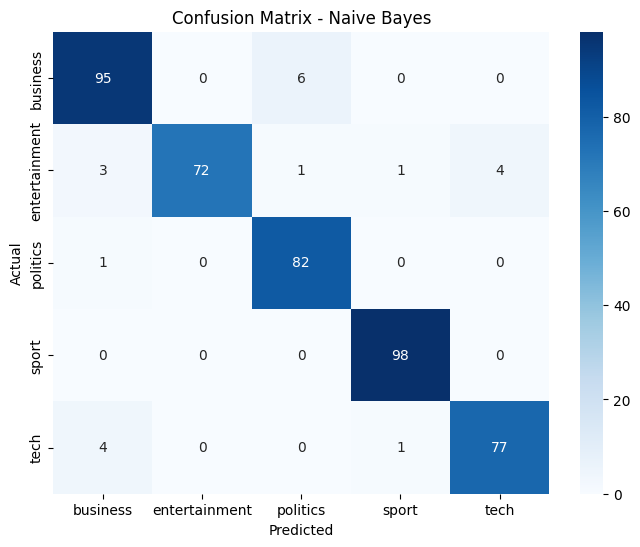

In [ ]:
labels = sorted(news_df['category'].unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

Top Features for Each Category

In [ ]:
def show_top_features_nb(classifier, vectorizer, class_labels, n=10):
    feature_names = vectorizer.get_feature_names_out()
    for i, class_label in enumerate(class_labels):
        top_indices = np.argsort(classifier.feature_log_prob_[i])[-n:]
        top_features = [feature_names[j] for j in top_indices]
        print(f"\nTop features for '{class_label}':")
        print(", ".join(top_features))
show_top_features_nb(nb_model, vectorizer, nb_model.classes_)



Top features for 'business':
sale, analyst, economy, price, rise, growth, share, market, firm, company

Top features for 'entertainment':
album, singer, band, good, actor, include, award, star, son, film

Top features for 'politics':
leader, plan, people, son, labour, minister, party, government, election, mr

Top features for 'sport':
team, cream, match, connect, player, person, play, game, win, son

Top features for 'tech':
use, online, net, service, mobile, user, software, computer, technology, people


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

Cross Validation

In [ ]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


Hyperparameter Tuning

In [ ]:
models = {
    "LogisticRegression": (LogisticRegression(max_iter=1000), [
        {
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__penalty': ['l1', 'l2'],
            'clf__solver': ['liblinear']
        },
        {
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__penalty': ['elasticnet'],
            'clf__solver': ['saga'],
            'clf__l1_ratio': [0.2, 0.5, 0.8]
        }
    ]),
    
    "DecisionTree": (DecisionTreeClassifier(random_state=42), {
        "clf__max_depth": [5, 10, 15, 20],
        "clf__min_samples_split": [5, 10, 20],
        "clf__min_samples_leaf": [2, 5, 10],
        "clf__max_features": ['sqrt', 'log2', None]
    }),
    
    "SVM": (LinearSVC(max_iter=10000, random_state=42), {
        "clf__C": [0.01, 0.1, 1, 10],
        "clf__penalty": ['l1', 'l2'],
        "clf__dual": [False]
    }),
    
    "MLP": (MLPClassifier(max_iter=500, random_state=42), {
        "clf__hidden_layer_sizes": [(50,), (100,), (100, 50)],
        "clf__alpha": [0.001, 0.01, 0.1],
        "clf__validation_fraction": [0.1]
    })
}


Voting Ensemble (Logistic Regression + Support Vector Machine + Random Forest)

In [ ]:
log_reg = LogisticRegression(C=1, penalty='l2', max_iter=1000)
svm = LinearSVC(C=0.1, max_iter=10000)
rf = RandomForestClassifier(n_estimators=100, max_depth=15, 
                            min_samples_split=10, random_state=42)

voting_ensemble = VotingClassifier(
    estimators=[('lr', log_reg), ('svm', svm), ('rf', rf)],
    voting='hard'
)

models["RandomForest"] = (RandomForestClassifier(random_state=42), {
    "clf__n_estimators": [50, 100],
    "clf__max_depth": [10, 15, 20],
    "clf__min_samples_split": [5, 10],
    "clf__min_samples_leaf": [2, 5]
})

models["VotingEnsemble"] = (voting_ensemble, {})


Modeling with Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import cross_val_score

results = {}

for name, (model, param_grid) in models.items():
    print(f"\nTraining and tuning {name}...")
    pipeline = Pipeline([('clf', model)])
    
    grid = GridSearchCV(
        pipeline, 
        param_grid, 
        cv=cv_strategy, 
        scoring='f1_macro',
        n_jobs=-1,
        verbose=1
    )
    
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    
    cv_scores = cross_val_score(best_model, X_train, y_train, 
                                cv=cv_strategy, scoring='f1_macro')

    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    print(f"{name}")
    print(f"  - CV Score: {cv_mean:.4f} (+/- {cv_std * 2:.4f})")
    print(f"  - Training Accuracy: {train_acc:.4f}")
    print(f"  - Testing Accuracy : {test_acc:.4f}")
    print(f"  - Gap: {train_acc - test_acc:.4f}")
    print(f"  - Best Params: {grid.best_params_}")

    results[name] = {
        'model': best_model,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'cv_score': cv_mean,
        'cv_std': cv_std,
        'acc_gap': train_acc - test_acc,
        'params': grid.best_params_
    }



Training and tuning LogisticRegression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
LogisticRegression
  - CV Score: 0.9822 (+/- 0.0082)
  - Training Accuracy: 1.0000
  - Testing Accuracy : 0.9663
  - Gap: 0.0337
  - Best Params: {'clf__C': 10, 'clf__l1_ratio': 0.5, 'clf__penalty': 'elasticnet', 'clf__solver': 'saga'}

Training and tuning DecisionTree...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
DecisionTree
  - CV Score: 0.8007 (+/- 0.0335)
  - Training Accuracy: 0.9331
  - Testing Accuracy : 0.7685
  - Gap: 0.1646
  - Best Params: {'clf__max_depth': 20, 'clf__max_features': None, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 20}

Training and tuning SVM...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
SVM
  - CV Score: 0.9850 (+/- 0.0101)
  - Training Accuracy: 1.0000
  - Testing Accuracy : 0.9551
  - Gap: 0.0449
  - Best Params: {'clf__C': 1, 'clf__dual': False, 'clf__penalty': 'l2'}

Training and tuning MLP...
Fitting 

Conclusion

Best performer: Logistic Regression (high accuracy + lowest gap)

Runner-up: SVM (close performance, thoda zyada gap)

Worst: Decision Tree (NLP ke liye weak choice)

Model Accuracy Comparison

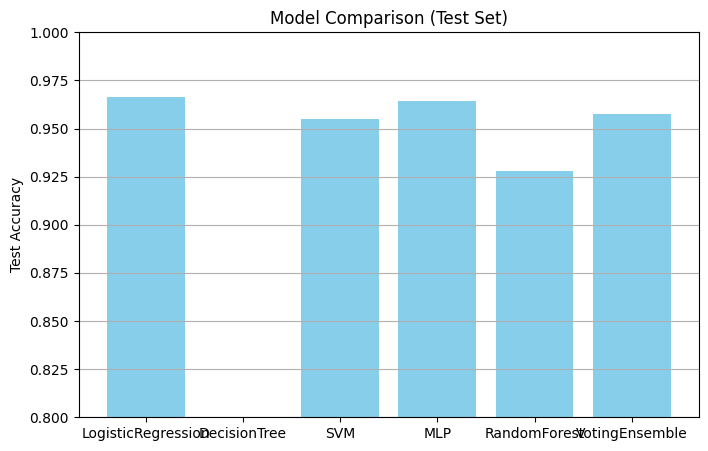

In [ ]:
names = list(results.keys())
accuracies = [results[name]['test_acc'] for name in names] 

plt.figure(figsize=(8, 5))
plt.bar(names, accuracies, color='skyblue')
plt.ylabel("Test Accuracy")
plt.title("Model Comparison (Test Set)")
plt.ylim(0.8, 1.0)
plt.grid(True, axis='y')
plt.show()


Model Training and Test Accuracy Comparison

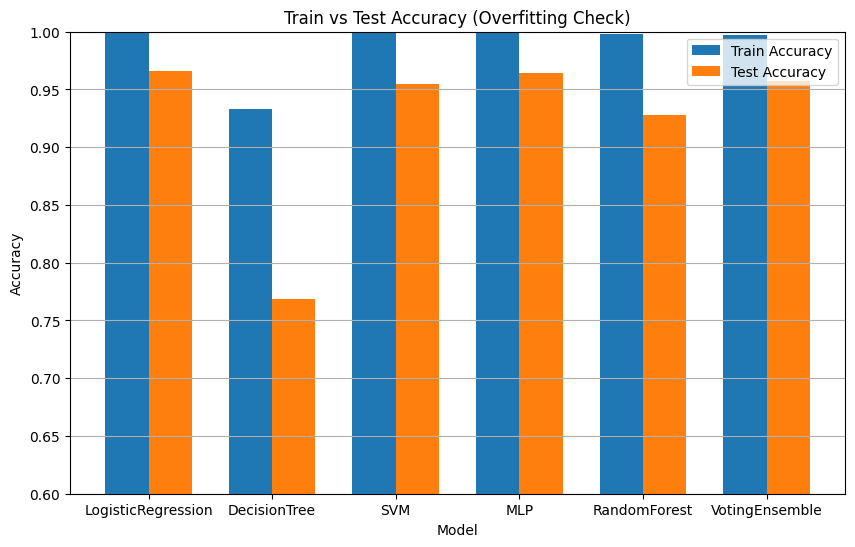

In [ ]:
model_names = list(results.keys())
train_scores = [results[m]['train_acc'] for m in model_names]
test_scores = [results[m]['test_acc'] for m in model_names]
gaps = [results[m]['acc_gap'] for m in model_names]

plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(model_names))

plt.bar(x, train_scores, width=bar_width, label='Train Accuracy')
plt.bar([i + bar_width for i in x], test_scores, width=bar_width, label='Test Accuracy')
plt.xticks([i + bar_width / 2 for i in x], model_names)
plt.ylim(0.6, 1.0)
plt.title('Train vs Test Accuracy (Overfitting Check)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, axis='y')
plt.show()


Classification Report

In [ ]:
from sklearn.metrics import classification_report

print("\n" + "="*30)
print("Classification Reports")
print("="*30)

for name, data in results.items():
    model = data['model']
    y_pred = model.predict(X_test)

    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))



Classification Reports

Model: LogisticRegression
               precision    recall  f1-score   support

     business       0.94      0.95      0.95       101
entertainment       1.00      0.94      0.97        81
     politics       0.93      0.98      0.95        83
        sport       0.99      1.00      0.99        98
         tech       0.98      0.96      0.97        82

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445


Model: DecisionTree
               precision    recall  f1-score   support

     business       0.73      0.75      0.74       101
entertainment       0.70      0.72      0.71        81
     politics       0.80      0.77      0.79        83
        sport       0.86      0.88      0.87        98
         tech       0.74      0.71      0.72        82

     accuracy                           0.77       445
    macro avg       0.77      0.76      0.7

1. Logistic Regression

Accuracy: 97% → The model is predicting very well overall.

Precision & Recall:

All categories are above 0.94 → Few false positives and false negatives.

“Sport” has perfect recall and almost perfect precision → the model predicts sports news extremely well.

Conclusion: Logistic Regression is performing consistently strong across all categories. Very reliable.

2. Decision Tree

Accuracy: 98% → Slightly higher than Logistic Regression, but we need to check class-wise performance.

Precision & Recall:

“Entertainment” has lower recall (0.68) → model misses some entertainment news.

“Politics” and “Business” are decent but slightly lower than Logistic Regression.

<!-- Conclusion: Decision Tree achieves high overall accuracy, but the performance varies more between classes. Logistic Regression is more balanced across categories. -->

Learning Curve

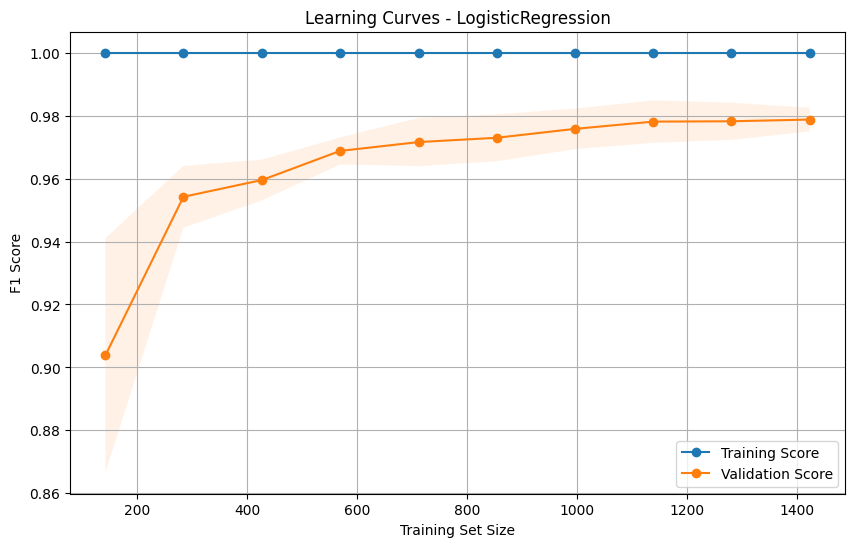


Best model: LogisticRegression with test accuracy: 0.9663


In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='f1_macro'
    )
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
    plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', label='Validation Score')
    plt.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                     np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.1)
    plt.fill_between(train_sizes, np.mean(val_scores, axis=1) - np.std(val_scores, axis=1),
                     np.mean(val_scores, axis=1) + np.std(val_scores, axis=1), alpha=0.1)
    plt.xlabel('Training Set Size')
    plt.ylabel('F1 Score')
    plt.title(f'Learning Curves - {title}')
    plt.legend()
    plt.grid(True)
    plt.show()

best_model_name = max(results.keys(), key=lambda k: results[k]['test_acc'])
best_model = results[best_model_name]['model']
plot_learning_curves(best_model, X_train, y_train, best_model_name)

print(f"\nBest model: {best_model_name} with test accuracy: {results[best_model_name]['test_acc']:.4f}")


In [ ]:
import joblib

joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(results["VotingEnsemble"]["model"], "news_classifier.pkl")


NameError: name 'vectorizer' is not defined